In [1]:
from same.data_manager import data_helper
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = data_helper["datasets"] / "main/main_dataset.xlsx"
data = pd.read_excel(path)


In [3]:
len(data)

130303

In [4]:
data.head()

,Код,Наименование,НаименованиеПолное,Группа,ВидНоменклатуры,ЕдиницаИзмерения
0,НИ-IS0032430,Cветильник LED панель 50W 6500k IP40 1200мм ДП...,Cветильник LED панель 50W 6500k IP40 1200мм ДП...,АВАНСОВЫЙ ОТЧЕТ,Инвентарь и хозяйственные принадлежности,шт
1,НИ-IS0040225,"Cветильник потолочный,Osairous,Белый, 30Вт LED...","Cветильник потолочный,Osairous,Белый, 30Вт LED...",АВАНСОВЫЙ ОТЧЕТ,Сырье и материалы,шт
2,НИ-IS0014483,Cистема IP-DECT Yealink W80DM контроллер микро...,Cистема IP-DECT Yealink W80DM контроллер микро...,АВАНСОВЫЙ ОТЧЕТ,Инвентарь и хозяйственные принадлежности,шт
3,НИ-IS0047648,Cпрей для ванной комнаты Sanfor (Санфор) 500мл,Cпрей для ванной комнаты Sanfor (Санфор) 500мл,АВАНСОВЫЙ ОТЧЕТ,Сырье и материалы,шт
4,НИ-IS0047649,Cпрей ультрабелый Sanfor (Санфор) 500мл,Cпрей ультрабелый Sanfor (Санфор) 500мл,АВАНСОВЫЙ ОТЧЕТ,Сырье и материалы,шт


In [5]:
data.columns

Index(['Код', 'Наименование', 'НаименованиеПолное', 'Группа',
       'ВидНоменклатуры', 'ЕдиницаИзмерения'],
      dtype='object')

In [6]:
data[data.duplicated(["Наименование"], keep=False)].sort_values('Наименование').head()

,Код,Наименование,НаименованиеПолное,Группа,ВидНоменклатуры,ЕдиницаИзмерения
87966,ХС-000000011,"5400, Насос ФЕКАЛЬНЫЙ 140/6","5400, Насос ФЕКАЛЬНЫЙ 140/6",Насосы общехозяйственного назначения и ЗИП к ним,Основное средство,шт
87965,МС-019379,"5400, Насос ФЕКАЛЬНЫЙ 140/6","5400, Насос ФЕКАЛЬНЫЙ 140/6",Насосы общехозяйственного назначения и ЗИП к ним,Оборудование малоценное,шт
14735,Ц0000013326,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Агрегат насосный БГ11-24 с электродвигателем 4кВт,"Агрегаты, установки, станции насосные",Инвентарь и хозяйственные принадлежности,шт
87627,Ц0000065584,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Насосы,Оборудование малоценное,шт
87630,ХС-000000014,Агрегат насосный консольный К65-50-160 с элект...,Агрегат насосный консольный К65-50-160 с элект...,Насосы,Основное средство,шт


In [7]:
types_count = {type: len(data[data["ВидНоменклатуры"] == type]) for type in data["ВидНоменклатуры"].unique()}

In [8]:
len(types_count.keys())

39

17


/var/folders/h8/fhfvbn0j38nd4r3z3s719g1m0000gn/T/ipykernel_38519/1979653257.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


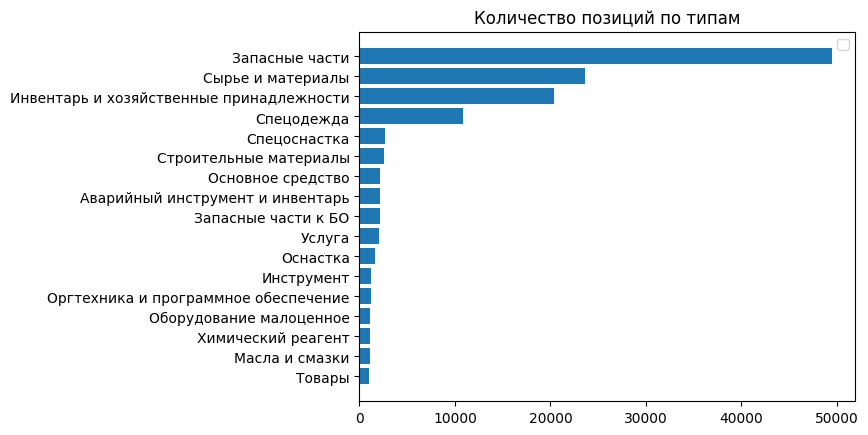

In [9]:
# bath_size = 13
# plot_data = []

# for type_item, count in sorted(types_count.items(), key=lambda x: x[1], reverse=True):
#     plot_data.append((type_item, count))
#     if len(plot_data) == bath_size:
#         types_count = dict(plot_data)
#         plot_data = []
#         plt.figure(figsize=(10, 5))
#         plt.bar(types_count.keys(), types_count.values())
#         plt.title("Количество позиций по типам")
#         plt.legend()
    #     plt.show()
types_count = {k: v for k, v in filter(lambda item: item[1] > 1000, types_count.items())}
print(len(types_count.keys()))
plt.barh({k: v for k, v in sorted(types_count.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(types_count.items(), key=lambda item: item[1])}.values())
plt.title("Количество позиций по типам")
plt.legend()
plt.show()

4


/var/folders/h8/fhfvbn0j38nd4r3z3s719g1m0000gn/T/ipykernel_38519/4040333737.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


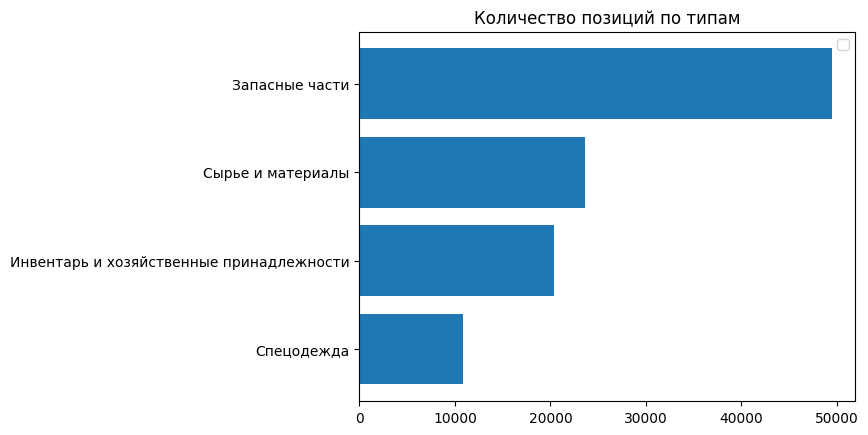

In [10]:
types_count = {k: v for k, v in filter(lambda item: item[1] > 10000, types_count.items())}
print(len(types_count.keys()))
plt.barh({k: v for k, v in sorted(types_count.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(types_count.items(), key=lambda item: item[1])}.values())
plt.title("Количество позиций по типам")
plt.legend()
plt.show()

In [11]:
sum(types_count.values())

104202

In [12]:
data_buffer = {}

for type_item in types_count.keys():
    data_buffer[type_item] = data[data["ВидНоменклатуры"] == type_item]
    print(f"✅ Создан датасет для {type_item} из {len(data_buffer[type_item])} позиций")

print(sum([len(data_buffer[type_item]) for type_item in data_buffer.keys()]))


✅ Создан датасет для Инвентарь и хозяйственные принадлежности из 20321 позиций
✅ Создан датасет для Сырье и материалы из 23577 позиций
✅ Создан датасет для Запасные части из 49468 позиций
✅ Создан датасет для Спецодежда из 10836 позиций
104202


In [13]:
for type_item in data_buffer.keys():
    print(data_buffer[type_item].head())


             Код                                       Наименование  \
0   НИ-IS0032430  Cветильник LED панель 50W 6500k IP40 1200мм ДП...   
2   НИ-IS0014483  Cистема IP-DECT Yealink W80DM контроллер микро...   
7   НИ-IS0047372  Cтроп цепной 1СЦ (одноветвевой стандартный)-2т 4м   
9   НИ-IS0000748     Dallas Lock 8/0-C (СЗИ НСД ,СКН ) (ПО) (до 10)   
23  НИ-IS0034116      Автотрансформатор регулируемый 220В (0В-300В)   

                                   НаименованиеПолное           Группа  \
0   Cветильник LED панель 50W 6500k IP40 1200мм ДП...  АВАНСОВЫЙ ОТЧЕТ   
2   Cистема IP-DECT Yealink W80DM контроллер микро...  АВАНСОВЫЙ ОТЧЕТ   
7   Cтроп цепной 1СЦ (одноветвевой стандартный)-2т 4м  АВАНСОВЫЙ ОТЧЕТ   
9      Dallas Lock 8/0-C (СЗИ НСД ,СКН ) (ПО) (до 10)  АВАНСОВЫЙ ОТЧЕТ   
23      Автотрансформатор регулируемый 220В (0В-300В)  АВАНСОВЫЙ ОТЧЕТ   

                             ВидНоменклатуры ЕдиницаИзмерения  
0   Инвентарь и хозяйственные принадлежности               шт  


In [14]:
duplicated_counts = data['Наименование'].value_counts()
duplicates_only = duplicated_counts[duplicated_counts > 1]

print(f"Всего уникальных коротких наименований: {data['Наименование'].nunique()}")
print(f"Количество дубликатов (встречаются более одного раза): {len(duplicates_only)}")
print("Топ-10 дублирующихся наименований:")
print(duplicates_only.head(10))
print(sum(duplicates_only.values))

Всего уникальных коротких наименований: 128937
Количество дубликатов (встречаются более одного раза): 1172
Топ-10 дублирующихся наименований:
Наименование
Выключатель автоматический модульный ВА47-100-3С80-УХЛ3-КЭАЗ 141629    22
Емкость пластиковая под питьевую воду 50 л                             20
Вентилятор вытяжной Blauberg Aero Vintage 125                          19
Ключ шарнирный КШС 219-245                                              8
Ключ трубный цепной облегченный КЦО-1                                   8
Насос электрический погружной PETROLL Spire 24V (52мм)                  7
Штроп эксплуатационный ШЭ-32                                            6
Ключ шарнирный КШС 73-89 ТУ 342216-75                                   6
Сапоги кожаные с жестким подноском                                      6
Ключ шарнирный КШС-108-127                                              6
Name: count, dtype: int64
2538


In [15]:
data['is_equal'] = data['Наименование'] == data['НаименованиеПолное']

total_equal = data['is_equal'].sum()
total_diff = len(data) - total_equal

print(f"Совпадает полностью: {total_equal}")
print(f"Различаются: {total_diff}")

Совпадает полностью: 128458
Различаются: 1845


In [16]:
# Только те строки, где значения отличаются
differences_data = data[data['is_equal'] == False][['Наименование', 'НаименованиеПолное']]

print("Примеры различий:")
print(differences_data.head(10))

Примеры различий:
                                           Наименование  \
6                      Cтиральный порошок Персил 2.1 кг   
40    Адаптер блютуз приемник Ugreen AUX 5,3 RCA 3,5...   
152   Антенна для модема 4g. Мощная, простая в устан...   
447   Башмак поплавковый с композитным насосом Avror...   
470   Белье мужское утепленное Камыш фуфайка ФМ1/кал...   
662                              Бокс для дисков черный   
865   Брюки для зашиты от общих производственных заг...   
1034  Вантуз гармошка для раковины и ванны SWEET HOM...   
1251  Вино игристое Бруни Просеко Экстра Драй, 2022г...   
1270  Вино ординарное белое сухое Альто Адидже Пино ...   

                                     НаименованиеПолное  
6                      Порошок стиральный Персил 2.1 кг  
40    Адаптер Bluetooth приемник Ugreen AUX 5,3 RCA ...  
152   Антенна для модема 4g. Мощная, простая в устан...  
447   Башмак поплавковый с композитным насосом Avror...  
470   Белье мужское утепленное Камыш фуфай

In [17]:
import re

def normalize(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)  # убираем повторяющиеся пробелы
    return text

data['short_name_norm'] = data['Наименование'].apply(normalize)
data['full_name_norm'] = data['НаименованиеПолное'].apply(normalize)

# Сравним снова по нормализованным значениям
data['is_equal_norm'] = data['short_name_norm'] == data['full_name_norm']
print("После нормализации:")
print(data['is_equal_norm'].value_counts())

После нормализации:
is_equal_norm
True     128503
False      1800
Name: count, dtype: int64


In [18]:
from fuzzywuzzy import fuzz

data['similarity'] = data.apply(
    lambda row: fuzz.token_sort_ratio(row['short_name_norm'], row['full_name_norm']),
    axis=1
)

# Найдём строки с похожестью больше 80%, но меньше 100
similar_but_not_equal = data[(data['similarity'] >= 80) & (data['similarity'] < 100)]

print(f"Похожих строк (>=80% схожести): {len(similar_but_not_equal)}")
print(similar_but_not_equal[['Наименование', 'НаименованиеПолное', 'similarity']].head(10))

Похожих строк (>=80% схожести): 939
                                           Наименование  \
40    Адаптер блютуз приемник Ugreen AUX 5,3 RCA 3,5...   
152   Антенна для модема 4g. Мощная, простая в устан...   
447   Башмак поплавковый с композитным насосом Avror...   
470   Белье мужское утепленное Камыш фуфайка ФМ1/кал...   
865   Брюки для зашиты от общих производственных заг...   
1034  Вантуз гармошка для раковины и ванны SWEET HOM...   
1270  Вино ординарное белое сухое Альто Адидже Пино ...   
1754  Гидрораспределитель BE6.574A Г24 электроуправл...   
2249  Доска-планшет BRAUBERG Contract, плотная с вер...   
2362  Жидкость моющая для полов и стен Mr Proper (М-...   

                                     НаименованиеПолное  similarity  
40    Адаптер Bluetooth приемник Ugreen AUX 5,3 RCA ...          90  
152   Антенна для модема 4g. Мощная, простая в устан...          90  
447   Башмак поплавковый с композитным насосом Avror...          97  
470   Белье мужское утепленное Кам

In [19]:
test = data[(data['similarity'] >= 70) & (data['similarity'] < 100)].sort_values(by='similarity', ascending=False)
test[['Наименование', 'НаименованиеПолное', 'similarity']].tail(10)

,Наименование,НаименованиеПолное,similarity
94951,Костюм для защиты от пониженных температур для...,Костюм для защиты от пониженных температур из ...,71
16628,Источник бесперебойного питания Dexp CEE-E 650VA,Источник бесперебойного питания Dexp CEE-E 650...,71
41777,"Баллон воздушный 18"" сцепления ATD118H","Баллон воздушный 18"" сцепления ATD118H коробки...",70
84979,Лист металлический гофрированный ЛМГ 36.015.40...,Лист металлический гофрированный ЛМГ 36.015.40...,70
66412,"Диск отрезной 36200-125-1,0","Диск отрезной Зубр 125х1,0мм артикул 36200-125...",70
89973,Блок питания модульный 1000W AC Huawei PAC1000...,Блок питания модульный 1000W AC PoE power modu...,70
83735,Манометр общетехнический ТМ-610Р.00(0-25MPa)М2...,Манометр общетехнический ТМ-610Р.00(0-25MPa)М2...,70
92946,"Печь портативная, 3-х вальцевая.174-00-1","Печь портативная, 3-х вальцевая, емкость камер...",70
82525,Подставка складная Krause Treppo 126030,Подставка складная Krause Treppo 2x3 двухсторо...,70
83717,"Манометр общетехнический ТМ-510Р.00(0-0,6MPa)М...","Манометр общетехнический ТМ-510Р.00(0-0,6MPa)М...",70


In [20]:
total_diff - len(similar_but_not_equal)

906

In [21]:
df = data[data.duplicated(['Наименование', 'ВидНоменклатуры', 'Группа',
                           'ЕдиницаИзмерения'], keep=False)].sort_values('Наименование')

In [22]:
df

,Код,Наименование,НаименованиеПолное,Группа,ВидНоменклатуры,ЕдиницаИзмерения,is_equal,short_name_norm,full_name_norm,is_equal_norm,similarity
87628,ХС-000000116,Агрегат насосный консольный К65-50-160 с элект...,Агрегат насосный консольный К65-50-160 с элект...,Насосы,Основное средство,шт,True,агрегат насосный консольный к65-50-160 с элект...,агрегат насосный консольный к65-50-160 с элект...,True,100
87629,ХС-000000109,Агрегат насосный консольный К65-50-160 с элект...,Агрегат насосный консольный К65-50-160 с элект...,Насосы,Основное средство,шт,True,агрегат насосный консольный к65-50-160 с элект...,агрегат насосный консольный к65-50-160 с элект...,True,100
87630,ХС-000000014,Агрегат насосный консольный К65-50-160 с элект...,Агрегат насосный консольный К65-50-160 с элект...,Насосы,Основное средство,шт,True,агрегат насосный консольный к65-50-160 с элект...,агрегат насосный консольный к65-50-160 с элект...,True,100
87631,ХС-000000392,Агрегат насосный консольный К65-50-160 с элект...,Агрегат насосный консольный К65-50-160 с элект...,Насосы,Основное средство,шт,True,агрегат насосный консольный к65-50-160 с элект...,агрегат насосный консольный к65-50-160 с элект...,True,100
87632,ХС-000000008,Агрегат насосный консольный К65-50-160 с элект...,Агрегат насосный консольный К65-50-160 с элект...,Насосы,Основное средство,шт,True,агрегат насосный консольный к65-50-160 с элект...,агрегат насосный консольный к65-50-160 с элект...,True,100
...,...,...,...,...,...,...,...,...,...,...,...
39368,НИ-000032423,Электроды Т-590 D4мм,Электроды Т-590 D4мм,ЗИП и принадлежности к электросварочному обору...,Сырье и материалы,кг,True,электроды т-590 d4мм,электроды т-590 d4мм,True,100
39366,НИ-000004430,Электроды Т-590 D4мм,Электроды Т-590 D4мм,ЗИП и принадлежности к электросварочному обору...,Сырье и материалы,кг,True,электроды т-590 d4мм,электроды т-590 d4мм,True,100
65014,Ц0000121750,Ящик для инструмента,Ящик для инструмента,Изделия для временного хранения и транспортиро...,Инвентарь и хозяйственные принадлежности,шт,True,ящик для инструмента,ящик для инструмента,True,100
65013,Ц0000118190,Ящик для инструмента,Ящик для инструмента,Изделия для временного хранения и транспортиро...,Инвентарь и хозяйственные принадлежности,шт,True,ящик для инструмента,ящик для инструмента,True,100


In [23]:
df_new = data.drop_duplicates(['Наименование', 'ВидНоменклатуры', 'Группа',
                           'ЕдиницаИзмерения']).sort_values('Наименование')

df_new

,Код,Наименование,НаименованиеПолное,Группа,ВидНоменклатуры,ЕдиницаИзмерения,is_equal,short_name_norm,full_name_norm,is_equal_norm,similarity
117664,НИ-000020603,Крем Тор защитный для кожи рук и лица гидроф...,Крем Тор защитный для кожи рук и лица гидрофи...,"Средства по уходу за кожей рук, лица, глаз",Сырье и материалы,шт,False,крем тор защитный для кожи рук и лица гидрофил...,крем тор защитный для кожи рук и лица гидрофил...,False,96
21235,НИ-000021469,"Кресло для посетителей экокожа, цвет черный, ...","Кресло для посетителей экокожа, цвет черный, ...",Диваны и кресла,Инвентарь и хозяйственные принадлежности,шт,True,"кресло для посетителей экокожа, цвет черный, п...","кресло для посетителей экокожа, цвет черный, п...",True,100
118051,НИ-000004233,"Образец вязкости жидкости, бутыль 500 мл, РЭВ...","Образец вязкости жидкости, бутыль 500 мл, РЭВ...","Стандарт-титры, ГСО, поверочные газовые смеси",Химический реагент,шт,True,"образец вязкости жидкости, бутыль 500 мл, рэв-...","образец вязкости жидкости, бутыль 500 мл, рэв-...",True,100
79841,НИ-000017813,Переход с ПП на чугун(тапер) D110/124мм с ман...,Переход с ПП на чугун(тапер) D110/124мм с манж...,Комплектующие сантехнические,Сырье и материалы,шт,False,переход с пп на чугун(тапер) d110/124мм с манж...,переход с пп на чугун(тапер) d110/124мм с манж...,True,100
73295,НИ-000001682,Пистолет для выдавливания герметика 310 мл,Пистолет для выдавливания герметика 310 мл,Инструмент строительный,Инвентарь и хозяйственные принадлежности,шт,True,пистолет для выдавливания герметика 310 мл,пистолет для выдавливания герметика 310 мл,True,100
...,...,...,...,...,...,...,...,...,...,...,...
85406,МС-011982,рН-полоски с диапазоном 0-14,рН-полоски с диапазоном 0-14,Материалы расходные лабораторные,Сырье и материалы,шт,True,рн-полоски с диапазоном 0-14,рн-полоски с диапазоном 0-14,True,100
111661,М00000000408,резак,резак,Резаки газовые,Инвентарь и хозяйственные принадлежности,шт,True,резак,резак,True,100
10216,НИ-IS0017843,с/у сульфат марганца 10г,с/у сульфат марганца 10г,АВАНСОВЫЙ ОТЧЕТ,Прочие материалы,шт,True,с/у сульфат марганца 10г,с/у сульфат марганца 10г,True,100
10873,НИ-IS0020450,"сетка затеняющая 40,6*10 для теплиц","сетка затеняющая 40,6*10 для теплиц",АВАНСОВЫЙ ОТЧЕТ,Инвентарь и хозяйственные принадлежности,шт,True,"сетка затеняющая 40,6*10 для теплиц","сетка затеняющая 40,6*10 для теплиц",True,100


In [24]:
def add_final_name(df):
    df["final_name"] = df["full_name_norm"].apply(str.split)
    for i, row in df.iterrows():
        for word in row["short_name_norm"].split():
            if word not in row["final_name"]:
                df.at[i, "final_name"].append(word)
    
    return df["final_name"]
    

In [29]:
df_new["final_name"] = add_final_name(df_new.copy())

df_new.head()

,Код,Наименование,НаименованиеПолное,Группа,ВидНоменклатуры,ЕдиницаИзмерения,is_equal,short_name_norm,full_name_norm,is_equal_norm,similarity,final_name
117664,НИ-000020603,Крем Тор защитный для кожи рук и лица гидроф...,Крем Тор защитный для кожи рук и лица гидрофи...,"Средства по уходу за кожей рук, лица, глаз",Сырье и материалы,шт,False,крем тор защитный для кожи рук и лица гидрофил...,крем тор защитный для кожи рук и лица гидрофил...,False,96,"[крем, тор, защитный, для, кожи, рук, и, лица,..."
21235,НИ-000021469,"Кресло для посетителей экокожа, цвет черный, ...","Кресло для посетителей экокожа, цвет черный, ...",Диваны и кресла,Инвентарь и хозяйственные принадлежности,шт,True,"кресло для посетителей экокожа, цвет черный, п...","кресло для посетителей экокожа, цвет черный, п...",True,100,"[кресло, для, посетителей, экокожа,, цвет, чер..."
118051,НИ-000004233,"Образец вязкости жидкости, бутыль 500 мл, РЭВ...","Образец вязкости жидкости, бутыль 500 мл, РЭВ...","Стандарт-титры, ГСО, поверочные газовые смеси",Химический реагент,шт,True,"образец вязкости жидкости, бутыль 500 мл, рэв-...","образец вязкости жидкости, бутыль 500 мл, рэв-...",True,100,"[образец, вязкости, жидкости,, бутыль, 500, мл..."
79841,НИ-000017813,Переход с ПП на чугун(тапер) D110/124мм с ман...,Переход с ПП на чугун(тапер) D110/124мм с манж...,Комплектующие сантехнические,Сырье и материалы,шт,False,переход с пп на чугун(тапер) d110/124мм с манж...,переход с пп на чугун(тапер) d110/124мм с манж...,True,100,"[переход, с, пп, на, чугун(тапер), d110/124мм,..."
73295,НИ-000001682,Пистолет для выдавливания герметика 310 мл,Пистолет для выдавливания герметика 310 мл,Инструмент строительный,Инвентарь и хозяйственные принадлежности,шт,True,пистолет для выдавливания герметика 310 мл,пистолет для выдавливания герметика 310 мл,True,100,"[пистолет, для, выдавливания, герметика, 310, мл]"


In [27]:
df_new.duplicated(["final_name"], keep=False).sum()

1399

In [ ]:
df_dubl = df_new[df_new.duplicated(["final_name"], keep=False)].sort_values('final_name')

df_dubl

,Код,Наименование,НаименованиеПолное,Группа,ВидНоменклатуры,ЕдиницаИзмерения,is_equal,short_name_norm,full_name_norm,is_equal_norm,similarity,final_name
87966,ХС-000000011,"5400, Насос ФЕКАЛЬНЫЙ 140/6","5400, Насос ФЕКАЛЬНЫЙ 140/6",Насосы общехозяйственного назначения и ЗИП к ним,Основное средство,шт,True,"5400, насос фекальный 140/6","5400, насос фекальный 140/6",True,100,"[5400,, насос, фекальный, 140/6]"
87965,МС-019379,"5400, Насос ФЕКАЛЬНЫЙ 140/6","5400, Насос ФЕКАЛЬНЫЙ 140/6",Насосы общехозяйственного назначения и ЗИП к ним,Оборудование малоценное,шт,True,"5400, насос фекальный 140/6","5400, насос фекальный 140/6",True,100,"[5400,, насос, фекальный, 140/6]"
87627,Ц0000065584,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Насосы,Оборудование малоценное,шт,True,агрегат насосный бг11-24 с электродвигателем 4квт,агрегат насосный бг11-24 с электродвигателем 4квт,True,100,"[агрегат, насосный, бг11-24, с, электродвигате..."
14735,Ц0000013326,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Агрегат насосный БГ11-24 с электродвигателем 4кВт,"Агрегаты, установки, станции насосные",Инвентарь и хозяйственные принадлежности,шт,True,агрегат насосный бг11-24 с электродвигателем 4квт,агрегат насосный бг11-24 с электродвигателем 4квт,True,100,"[агрегат, насосный, бг11-24, с, электродвигате..."
114712,Ц0000065352,Адаптер 350х21/350х35,Адаптер 350х21/350х35,Соединения фланцевые устьевого оборудования,Запасные части,шт,True,адаптер 350х21/350х35,адаптер 350х21/350х35,True,100,"[адаптер, 350х21/350х35]"
...,...,...,...,...,...,...,...,...,...,...,...,...
39367,НИ-IS0009305,Электроды Т-590 D4мм,Электроды Т-590 D4мм,ЗИП и принадлежности к электросварочному обору...,Сырье и материалы,упак,True,электроды т-590 d4мм,электроды т-590 d4мм,True,100,"[электроды, т-590, d4мм]"
36410,Ц0000073736,Элемент фильтрующий воздушный AC2062,Элемент фильтрующий воздушный AC2062,"Запасные части к тракторам, специальной и доро...",Запасные части,шт,True,элемент фильтрующий воздушный ac2062,элемент фильтрующий воздушный ac2062,True,100,"[элемент, фильтрующий, воздушный, ac2062]"
50079,АУП000013738,Элемент фильтрующий воздушный AC2062,Элемент фильтрующий воздушный AC2062,ЗИП к компрессорам Atlas Copco,Запасные части,шт,True,элемент фильтрующий воздушный ac2062,элемент фильтрующий воздушный ac2062,True,100,"[элемент, фильтрующий, воздушный, ac2062]"
109385,Ц0000078028,Этиленгликоль ГОСТ 19710-83,Этиленгликоль ГОСТ 19710-83,Продукция химическая для процессов строительст...,Химический реагент,т,True,этиленгликоль гост 19710-83,этиленгликоль гост 19710-83,True,100,"[этиленгликоль, гост, 19710-83]"


In [33]:
df_dubl[df_dubl.duplicated(["Группа", "ВидНоменклатуры", "ЕдиницаИзмерения"], keep=False)].sort_values('final_name')

,Код,Наименование,НаименованиеПолное,Группа,ВидНоменклатуры,ЕдиницаИзмерения,is_equal,short_name_norm,full_name_norm,is_equal_norm,similarity,final_name
87966,ХС-000000011,"5400, Насос ФЕКАЛЬНЫЙ 140/6","5400, Насос ФЕКАЛЬНЫЙ 140/6",Насосы общехозяйственного назначения и ЗИП к ним,Основное средство,шт,True,"5400, насос фекальный 140/6","5400, насос фекальный 140/6",True,100,"[5400,, насос, фекальный, 140/6]"
87965,МС-019379,"5400, Насос ФЕКАЛЬНЫЙ 140/6","5400, Насос ФЕКАЛЬНЫЙ 140/6",Насосы общехозяйственного назначения и ЗИП к ним,Оборудование малоценное,шт,True,"5400, насос фекальный 140/6","5400, насос фекальный 140/6",True,100,"[5400,, насос, фекальный, 140/6]"
87627,Ц0000065584,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Насосы,Оборудование малоценное,шт,True,агрегат насосный бг11-24 с электродвигателем 4квт,агрегат насосный бг11-24 с электродвигателем 4квт,True,100,"[агрегат, насосный, бг11-24, с, электродвигате..."
14735,Ц0000013326,Агрегат насосный БГ11-24 с электродвигателем 4кВт,Агрегат насосный БГ11-24 с электродвигателем 4кВт,"Агрегаты, установки, станции насосные",Инвентарь и хозяйственные принадлежности,шт,True,агрегат насосный бг11-24 с электродвигателем 4квт,агрегат насосный бг11-24 с электродвигателем 4квт,True,100,"[агрегат, насосный, бг11-24, с, электродвигате..."
19761,НИ-IS0021022,Азот жидкий технический первый сорт ГОСТ 9293-74,Азот жидкий технический первый сорт ГОСТ 9293-74,Газы промышленные,Сырье и материалы,т,True,азот жидкий технический первый сорт гост 9293-74,азот жидкий технический первый сорт гост 9293-74,True,100,"[азот, жидкий, технический, первый, сорт, гост..."
...,...,...,...,...,...,...,...,...,...,...,...,...
39367,НИ-IS0009305,Электроды Т-590 D4мм,Электроды Т-590 D4мм,ЗИП и принадлежности к электросварочному обору...,Сырье и материалы,упак,True,электроды т-590 d4мм,электроды т-590 d4мм,True,100,"[электроды, т-590, d4мм]"
36410,Ц0000073736,Элемент фильтрующий воздушный AC2062,Элемент фильтрующий воздушный AC2062,"Запасные части к тракторам, специальной и доро...",Запасные части,шт,True,элемент фильтрующий воздушный ac2062,элемент фильтрующий воздушный ac2062,True,100,"[элемент, фильтрующий, воздушный, ac2062]"
50079,АУП000013738,Элемент фильтрующий воздушный AC2062,Элемент фильтрующий воздушный AC2062,ЗИП к компрессорам Atlas Copco,Запасные части,шт,True,элемент фильтрующий воздушный ac2062,элемент фильтрующий воздушный ac2062,True,100,"[элемент, фильтрующий, воздушный, ac2062]"
109385,Ц0000078028,Этиленгликоль ГОСТ 19710-83,Этиленгликоль ГОСТ 19710-83,Продукция химическая для процессов строительст...,Химический реагент,т,True,этиленгликоль гост 19710-83,этиленгликоль гост 19710-83,True,100,"[этиленгликоль, гост, 19710-83]"
